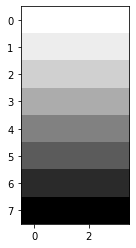

In [1]:
import numpy as np;
import matplotlib.pyplot as plt

d = np.zeros((8, 4))
for i in range(8) :
    d[i,:] = 32*i
    
plt.imshow(d, cmap='Greys',  interpolation='nearest')

Text(0.5, 0, 'Z Label')

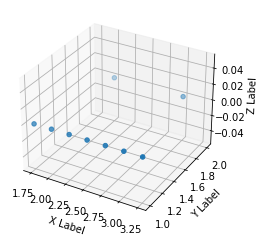

In [2]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

L = np.array([[2, 2], [3, 2], [1.75, 1], [2, 1], [2.25, 1], [2.5, 1], [2.75, 1], [3, 1], [3.25, 1]])
ax.scatter(L[:,0], L[:, 1], np.zeros(len(L)))
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

In [3]:
a = [1, 2, 3]
b = [5, 6, 7]
c = [9, 10, 11]
l =  ((x+y+z) for x, y, z in zip(a, b, c))
print (list(l))

an = np.array(a)
bn = np.array(b)
cn = np.array(c)
sumn = an+bn+cn
print (an)
print (sumn.shape)
print (sumn, sumn[0])
print (a+b+c)

[15, 18, 21]
[1 2 3]
(3,)
[15 18 21] 15
[1, 2, 3, 5, 6, 7, 9, 10, 11]


In [4]:
def arrowVec(orig, dest) :
    plt.plot([orig[0], dest[0]], [orig[1], dest[1]])
    

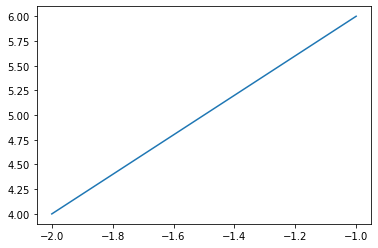

In [5]:
arrowVec([-2, 4], [-1, 6])

In [6]:
v = np.array([1, 2, 3, 4])
print (3*v)

[ 3  6  9 12]


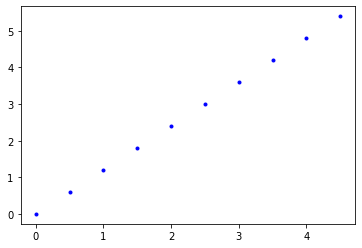

In [7]:
## set of points parallel to a vector

v = np.array([5, 6])
xs = np.array([x * v[0] for x in np.arange(0, 1, 0.1)])
ys = np.array([y * v[1] for y in np.arange(0, 1, 0.1)])

plt.plot(xs, ys, 'b.')


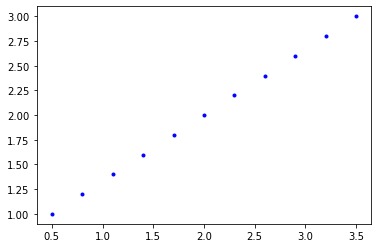

In [8]:
## Plot the line segment from (0.5, 1) to (3.5, 3)

start = np.array([0.5, 1])
end = np.array([3.5, 3])
diff = end - start

points = np.array([start + alpha*diff for alpha in np.arange(0, 1.1, 0.1)])
plt.plot(points[:,0], points[:,1], 'b.')

In [9]:
def plotLine(start, end, x) :
    diff = end - start
    points = np.array([start + alpha*diff for alpha in np.arange(0, 1.01, 0.01)])
    plt.plot(points[:,0], points[:,1], x)

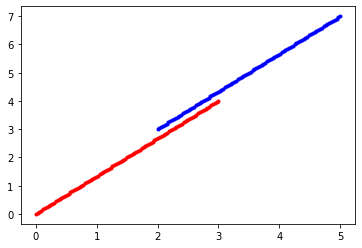

In [10]:
plotLine(np.array([2,3]), np.array([5, 7]), 'b.')
plotLine(np.array([0,0]), np.array([3, 4]), 'r.')

Start + (alpha * diff)


Start + (alpha * (End - Start))


Start(1-alpha) + alpha*End

Start * Beta + End * Alpha (where Alpha + Beta = 1)  [ Convex Combination of Start and End ]


In [11]:
def findConvexComb(v1, v2) :
    return np.array(list(a*v2 + (1-a)*v1 for a in np.arange(0, 1.25, 0.25)))

In [12]:
print (findConvexComb(np.array([2]), np.array([12])))

[[ 2. ]
 [ 4.5]
 [ 7. ]
 [ 9.5]
 [12. ]]


In [13]:
print (findConvexComb(np.array([5, 2]), np.array([10, -6])))

[[ 5.    2.  ]
 [ 6.25  0.  ]
 [ 7.5  -2.  ]
 [ 8.75 -4.  ]
 [10.   -6.  ]]


[[3.5  3.  ]
 [2.75 2.5 ]
 [2.   2.  ]
 [1.25 1.5 ]
 [0.5  1.  ]]


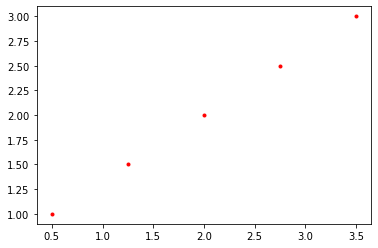

In [14]:
points = findConvexComb(np.array([3.5, 3]), np.array([0.5, 1]))
print (points)
plt.plot(points[:, 0], points[:,1], 'r.')

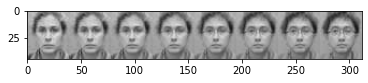

In [34]:
from image import file2image

u = np.array(file2image("img01.png"))
v = np.array(file2image("img02.png"))

#from PIL import Image
#u = np.array(Image.open("img01.png"))
#v = np.array(Image.open("img02.png"))

ilist = None
for i in range(8) :
    im = (v*i/8).astype('uint8') + (u*(8-i)/8).astype('uint8')
    if ilist is None :
        ilist = im
    else :
        ilist = np.hstack((ilist, im))
    #print (ilist.shape)

plt.imshow(ilist)


In [40]:
from vec import Vec

def zero_vec(D) : return Vec(D, {d: 0 for d in D})

x = zero_vec({'A', 'B'})
x.f['A']

0

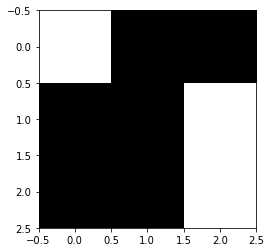

In [46]:
## Lights Out
s = np.array([[1, 0, 0], [0, 0, 1], [0, 0, 1]])
plt.imshow(s, cmap='gray')

In [73]:
def findButtonVectors(n, ind) :
    bv = np.zeros((n, n))
    
    if (ind[0] < 0 or ind[0] >= n or ind[1] < 0 or ind[1] >=n) :
        return bv
  
    bv[ind] = 1  ## index
    
    ##  row above
    if (ind[0] - 1) >= 0 :
        bv[ind[0]-1, ind[1]] = 1
        
    ##  col left
    if (ind[1] - 1) >= 0 :
        bv[ind[0], ind[1]-1] = 1
    
    ## row below
    if (ind[0] + 1 < n) :
        bv[ind[0]+1, ind[1]] = 1
    
    ## col right
    if (ind[1] + 1 < n) :
        bv[ind[0], ind[1] + 1] = 1
        
    return bv

print (findButtonVectors(3, (0, 2)))

[[0. 1. 1.]
 [0. 0. 1.]
 [0. 0. 0.]]


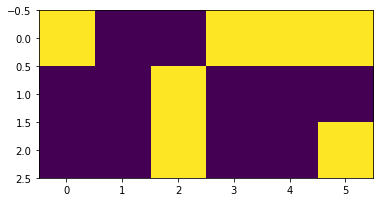

In [78]:
new_arr = np.logical_xor(s, findButtonVectors(3, (0, 2)))
plt.imshow(np.hstack((s, new_arr)))